In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Pclass: Passenger Class ( Class 1,2,3)
# SibSp : Number of siblings and spouse
# Parch : Numbe of parents and children

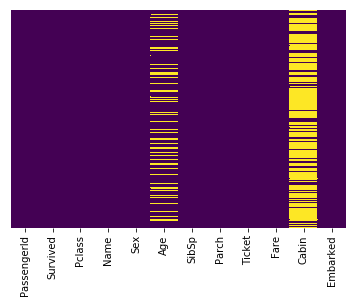

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Age and Cabin column have missing values
##### Age can be imputed but, the cabin column has too much missing values to make any sense of data

In [6]:
sns.set_style('whitegrid')

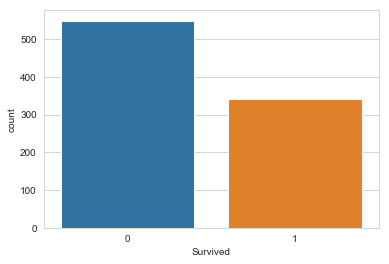

In [7]:
sns.countplot(x='Survived',data=train)

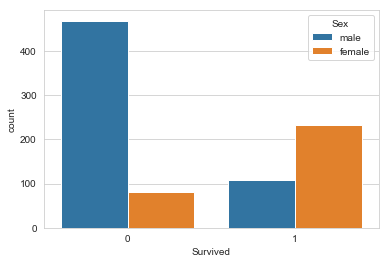

In [9]:
sns.countplot(x='Survived',data=train,hue='Sex')

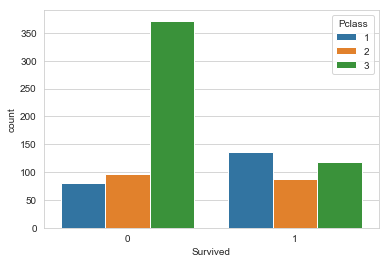

In [10]:
sns.countplot(x='Survived',data=train,hue='Pclass')

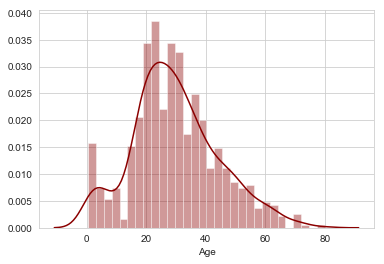

In [12]:
sns.distplot(train['Age'].dropna(),color='darkred',bins=30)

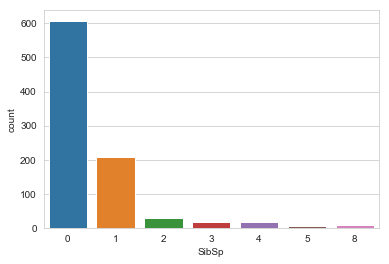

In [13]:
sns.countplot(x='SibSp',data=train)

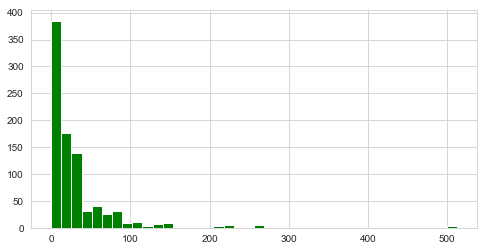

In [17]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. 

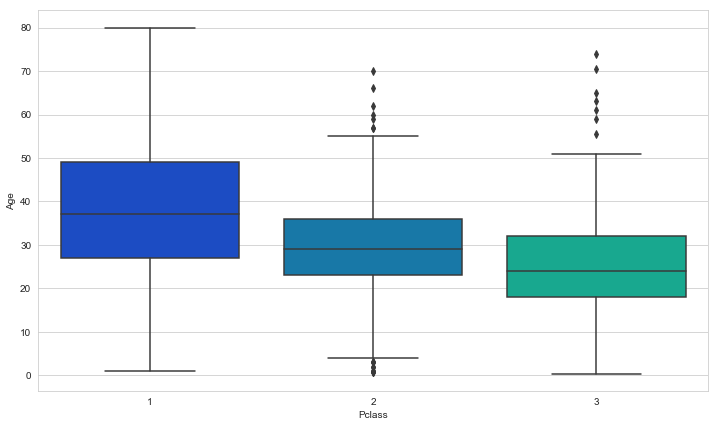

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [19]:
# Mean age of class1 is 37
# Mean age of class2 is 29
# Mean age of class3 is 24

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

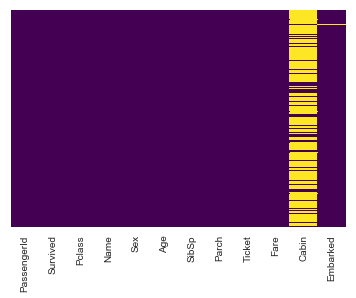

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column and the row in Embarked that is NaN.

In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
train.dropna(inplace=True)

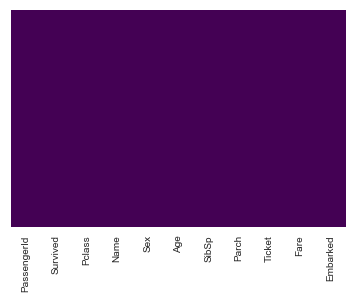

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, we will convert category variables to dummy variables

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [31]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [33]:
train = pd.concat([train,sex,embark],axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


We do not need the columns PassengerId,Name,Sex,Ticket and Embarked

In [35]:
train.drop(['Sex','Name','PassengerId','Ticket','Embarked'],axis=1,inplace=True)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
from sklearn.model_selection import train_test_split 

In [38]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]
